In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [14]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-22-CVD\\DoubleGate\\IdVd"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [8]:
file_first = file_list[3]
df = mo.read_csv_direction(file_first)
df

,VD,VG,VBG,ID,IG,sqrtID,forward
0,0.000,-1.5,2,-0.001016,-1.705000e-11,0.000032,True
1,0.015,-1.5,2,-0.000588,-1.530000e-11,0.000024,True
2,0.030,-1.5,2,-0.000514,-1.350000e-11,0.000023,True
3,0.045,-1.5,2,-0.000457,-1.265000e-11,0.000021,True
4,0.060,-1.5,2,-0.000414,-1.348000e-11,0.000020,True
...,...,...,...,...,...,...,...
1409,0.060,1.5,2,0.138640,1.429000e-10,0.000372,False
1410,0.045,1.5,2,0.104940,1.460200e-10,0.000324,False
1411,0.030,1.5,2,0.070097,1.445500e-10,0.000265,False
1412,0.015,1.5,2,0.034869,1.518800e-10,0.000187,False


In [9]:
df_reshaped = mo.reshape_table_by_VG(df)
df_reshaped.columns

MultiIndex([(' ID', -1.5),
            (' ID', -1.0),
            (' ID', -0.5),
            (' ID',  0.0),
            (' ID',  0.5),
            (' ID',  1.0),
            (' ID',  1.5)],
           names=[None, ' VG'])

In [10]:
df_sorted = mo.reorder_by_VD(df_reshaped)
df_new = df_sorted.reset_index().set_index(' VD')
df_new

,forward,V_G = -1.5,V_G = -1.0,V_G = -0.5,V_G = 0.0,V_G = 0.5,V_G = 1.0,V_G = 1.5
VD,,,,,,,,
0.000,False,-0.000284,-0.000255,-0.000258,-0.000258,-0.000294,-0.000265,-0.000330
0.015,False,-0.000283,-0.000250,-0.000241,0.002302,0.018816,0.030271,0.034869
0.030,False,-0.000275,-0.000243,-0.000230,0.004453,0.037207,0.060232,0.070097
0.045,False,-0.000276,-0.000243,-0.000227,0.006324,0.055044,0.090514,0.104940
0.060,False,-0.000257,-0.000231,-0.000217,0.007922,0.072382,0.119700,0.138640
...,...,...,...,...,...,...,...,...
0.060,True,-0.000414,-0.000160,-0.000116,0.008676,0.073541,0.119200,0.137320
0.045,True,-0.000457,-0.000177,-0.000138,0.006925,0.056232,0.089587,0.103987
0.030,True,-0.000514,-0.000186,-0.000158,0.004943,0.037955,0.060033,0.069479


In [11]:
df_new.drop(columns=' forward',inplace=True)
df_new.columns

Index(['V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0', 'V_G = 0.5',
       'V_G = 1.0', 'V_G = 1.5'],
      dtype='object')

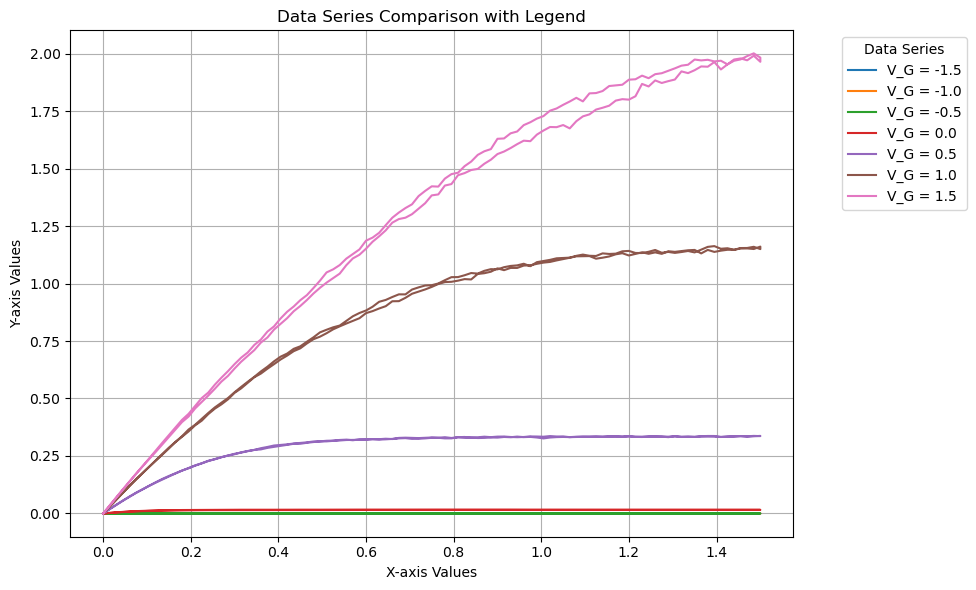

In [12]:
ax = df_new.plot( kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [15]:
for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    print(f'{result} started')
    
    df = mo.read_csv_direction(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VD(df_reshaped)
    df_new = df_sorted.reset_index().set_index(' VD')
    df_new.drop(columns=' forward',inplace=True)
    filename =directory_path + '\\sorted\\' + result
    df_new.to_csv(filename, index=True)
    

R10C6-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R10C6-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C10-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C10-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C11-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C11-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C2-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C3-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C5-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C9-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R11C9-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R12C3-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R12C3-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R12C5-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R12C5-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R12C6-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R14C2-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R14C2-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
R14C5-B__ExfoliatedMoS2_